# Midterm Review

## Supervised Learning

* Typical workflow of a Supervised Learning algorithm (L3, L6)
* Training and Test sets (L3)
* Model (L3)
* Objective/Cost/Loss Function (L3)

## Generalization & Regularization

* Overfitting and underfitting (L4, L6)
* Generalization (L4, L6)
* K-fold Cross-validation (L4, L6)
* Cross-validation (L4, L6)
* Regularization (L4, L6)
* Normalization (L7)

## Linear Regression

* Definition (L3)
* Polynomial Regression (L3)
* Cost function (L3)
* Analytical solution (L3)
* Pseudo-code (L3)

## Curse of Dimensionality

* Definition (L5)
* Ways to combat it (L5)

## Evaluations Metrics

* Accuracy (L6)
* Error (L6)
* Confusion Matrix (L6)
* True positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN) (L6)
* False Positive Rate (FPR), True Positive Rate (TPR), Precision, Recall (L6)
* Positive Predictive Value (PPV), Negative Predictive Rate (NPV) (L6)
* ROC curve, Area Under the Curve (AUC) (L6)

## Feature Selection

* Definition (L7, L8)
* L1-norm regularization (L7, L8)
* Sequential Backward Selection (SBS) (L7, L8)
* Sequential Forward Selection (SFS) (L7, L8)

## Feature Extraction

* Definition (L8, L9)
* Principal Component Analysis (PCA) (L8, L9)
* Linear Discriminant Analysis (LDA) (L9)

## Feature Generation

* (Applied to Image Processing) (L10)
* Definition (L10)
* Local and Global descriptors (L10)
* Convolution (L10)
* Histogram of Oriented Gradients (HOG) (L10, L11)
* Local Binary Patterns (LBP) (L10, L11)

## Classifiers

* Classification (L6)
* $k$-Nearest Neighbors (L11, L12)
* Decision Trees (L12)
* Random Forests (L12)
* Support Vector Machines (SVM) (L13)
* The Perceptron (L14, L15)
* Artificial Neural Networks (ANN) (L14, L15)
* Intro to Multi-layer Perceptron (MLP) (L14, L15)

# Practice Questions

Practice problems and solutions have been shared.

You can find them in them here: https://github.com/MachineLearning-S20/Lectures/tree/master/Midterm%20Exam%20Review

# Discussion Board Questions

The following questions were posed in our Midterm Discussion board and are listed according to most likes and date.

## Question 1

**Which models ($k$-NN, SVM, Perceptron/NN, Decision Trees, etc...) can be used to produce both discrete and continuous predictions? For example, can a Decision Tree be used outside of just classifying different classes?**

There are three main types of (machine) learning:
1. Supervised learning: algorithms learns to model to recreate target labels 
    * Classification. **Discrete-valued labels.** Ex: dog and cat, or label 1 and 2
    * Regression. **Continuous-valued labels.** Ex: stock market prediction

2. Unsupervised learning: algorithms find patterns in the data based on some similarity measure
    * Clustering
    
3. Reinforcement learning: algorithms learns to react to environment

**Classification algorithms:**
* Linear Discriminant Analysis (LDA)
* $k$-Nearest Neighbors ($k$-NN)
* Support Vector Machines (SVM)
* Decision Trees
* Random Forests
* The Perceptron
* Artificial Neural Networks (ANNs)

**Regression algorithms:**
* Linear regression
* Decision Trees
* Random Forests
* Artificial Neural Networks (ANNs)

## Question 2

**What are some illustrations of problems that a certain model is best/worse for? Ex: XOR problem for the perceptron. How do other models handle the XOR problem?**

The XOR problem is a classification problem (as it predicts whether data samples are class 0 or class 1).

Which model(s) will **NOT** perform well in the XOR problem?

* The options are: LDA, $k$-NN, Decision Tree, Random Forest, SVM and the Perceptron

* Follow this link to vote: www.wooclap.com/YHZMFO

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

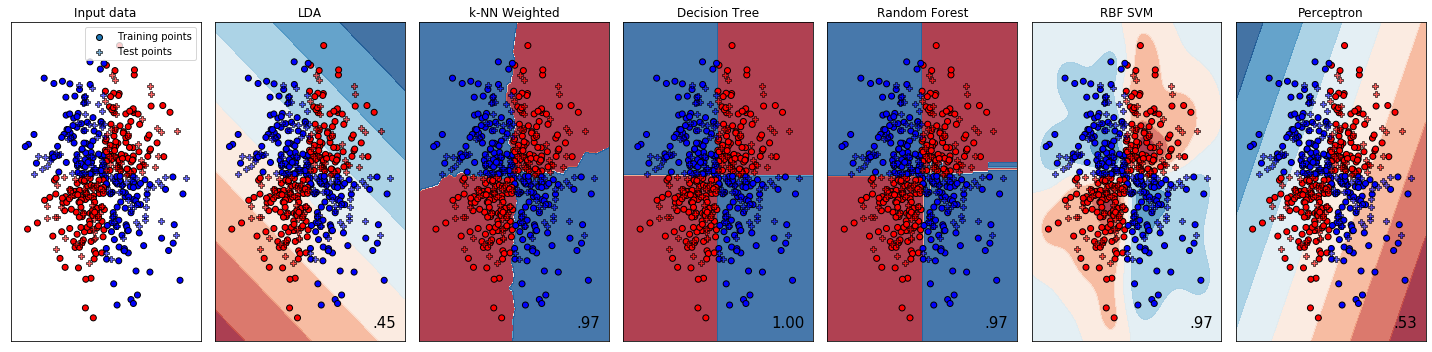

In [11]:
# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 5))

# set up classifiers
n_neighbors = 5
classifiers = [LDA(),\
               KNeighborsClassifier(n_neighbors, weights='distance', metric='euclidean'),\
               DecisionTreeClassifier(max_depth=5),\
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),\
               SVC(gamma=2, C=1),\
               Perceptron()
              ]
names = ["LDA", "k-NN Weighted","Decision Tree", \
         "Random Forest", "RBF SVM", "Perceptron"]

# Put together Data Sets
N_samples = 500
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(N_samples, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
XOR_data = (X,Y)

datasets = [XOR_data
            ]

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k',label='Training points')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### Takeaways

* LDA and the Perceptron algorithms are not able to correctly classify the XOR data set. That is because both LDA and the Perceptron algorithm find a linear decision boundary (line, plane or hyper-plane) to separate the two classes. However, there isn't such line that separates the two classes in the XOR problem.

* $k$-NN, decision trees, random forests and SVM (with RBF kernel) are able to correclty classify the XOR data set. (Note that SVM with a linear kernel would NOT be successful.)

## Question 3

**Which models can be used effectively with nonlinear data?**

For **classification problems**, the XOR data set is an example of a non-linear data set. As we discussed in the previous question, any method that relies on drawing a **linear** decision boundary will **NOT** be sucessful are correctly classifying that data set. 
* From the algorithms we studied, only LDA and the Perceptron will fail for non-linear separable classification data.

For **regression problems**, most data sets are "non-linear", meaning that in most cases, we are trying to find the "curve function" that generated a set of samples.

Consider the following data, drawn from the combination of a fast and slow oscillation:

In [165]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return np.array(slow_oscillation + fast_oscillation + noise)

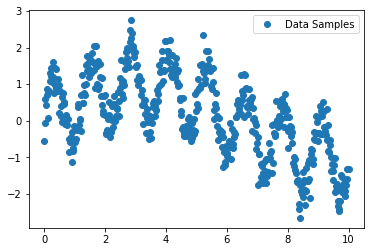

In [243]:
x = np.array(np.linspace(0, 10, 500))
ytrue = model(x, sigma=0)
y = model(x)

plt.plot(x, y, 'o', label='Data Samples')
# plt.plot(x, ytrue, '-k', label='True Model');
plt.legend();

Which model(s) will **NOT** perform well in this data set?

* The options are: linear regression with polynomial features, linear regression with linear features, decision trees, random forests, and ANNs

* Follow this link to vote: www.wooclap.com/BRCTFK

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

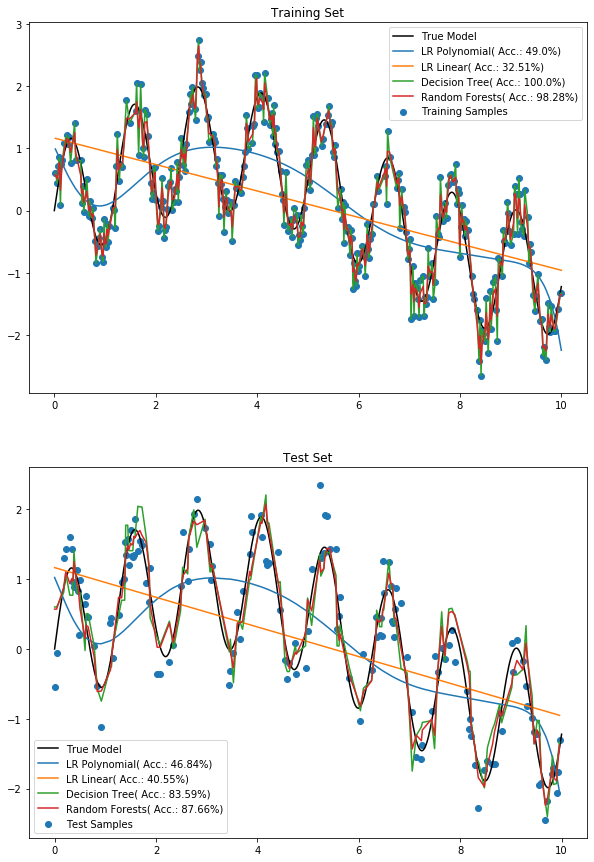

In [245]:
# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(10, 15))

# set up classifiers
n_neighbors = 5
classifiers = [LinearRegression(),\
               LinearRegression(),\
               DecisionTreeRegressor(),\
               RandomForestRegressor(n_estimators = 100)
              ]
names = ["LR Polynomial", "LR Linear",\
         "Decision Tree", "Random Forests"]

datasets = [regression_data
            ]

i = 0
for ds_cnt, ds in enumerate(datasets):
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(x, y, test_size=.3, random_state=42)
    idx=np.argsort(X_train)
    X_train = X_train[idx]
    y_train = y_train[idx]
    idx=np.argsort(X_test)
    X_test = X_test[idx]
    y_test = y_test[idx]
    
    i += 1
    
    ax = plt.subplot(2,1,2)
    ax.scatter(X_test, y_test, label='Test Samples')
    ax.plot(x, ytrue, '-k', label='True Model');
    ax.set_title('Test Set')
    
    ax2 = plt.subplot(2,1,1)
    ax2.scatter(X_train, y_train, label='Training Samples')
    ax2.plot(x, ytrue, '-k', label='True Model');
    ax2.set_title('Training Set')
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):        
        if i==1:
            poly = PolynomialFeatures(10)
            X_train2 = poly.fit_transform(X_train.reshape(-1,1))
            X_test2 = poly.fit_transform(X_test.reshape(-1,1))
            clf.fit(X_train2, y_train)
            score = clf.score(X_train2, y_train)
            yfit_train = clf.predict(X_train2)
            score_test = clf.score(X_test2, y_test)
            yfit_test = clf.predict(X_test2)
        else:
            clf.fit(X_train.reshape(-1,1), y_train)
            score = clf.score(X_train.reshape(-1,1), y_train)
            yfit_train = clf.predict(X_train.reshape(-1,1))
            score_test = clf.score(X_test.reshape(-1,1), y_test)
            yfit_test = clf.predict(X_test.reshape(-1,1))
        
        lgd_train = name + '( Acc.: ' + str(round(score*100,2)) + '%)'
        lgd_test = name + '( Acc.: ' + str(round(score_test*100,2)) + '%)'
        ax2.plot(X_train, yfit_train, label = lgd_train)
        ax.plot(X_test, yfit_test, label = lgd_test)
        
        i += 1
ax.legend();
ax2.legend();
        

### Takeaways

* Linear regression is a linear model, which means it works really nicely when the data has a linear shape. But, when the data has a non-linear shape, then a linear model cannot capture the non-linear features.

    * We can introduce non-linear features and still using a linear model, for example, Linear Regression with polynomial features. But if the features are sufficiently appropriate to describe the data (like the case above), then Linear Regression will still have issues.
    
* We can use decision trees, which do a better job at capturing the non-linearity in the data by dividing the space into smaller sub-spaces.

* Decision trees are proned to overfitting, as we saw in the example above, and so an even better model is random forests.

* There isn't any rule that we can role to decide which algorithm we should use for our data set. Other than experiment and quantify which model works the best, we often want to make sure that the data set and variables of interest fulfill the pre-assumptions of each algorithm.

## Question 4

**One of the midterm practice questions has you write down an objective function. Can we write down all the objective functions we'd like for the exam?**

**A better question might be, are we not allowed to write down certain formulas?**

You can write any objective function you want in your formula sheet.

There aren't any restrictions on what formulas and/or objective function you can bring.

## Question 5

**Will we have to know how to do matrix operations and transposes (linear algebra) for the exam?**

Basic vector and matrix operations will be useful in the exam.

Studying the lecture notes is sufficient.

## Question 6

**Which machine learning techniques are parametric and which are non-parametric? What are the advantages and disadvantages of each technique? In what situation(s) would it be best to use one machine learning method over another?**

### Parametric algorithms
Parametric models can be described with an explicit model function, for example, linear regression is captured using the model

$$y = \sum_{i=1}^M w_i x^i$$

Because of that, parametric model make assumptions about the underlying unknown *natural* phenomenon that generated the data sample.

* These assumptions can greatly simplify the learning process, but it can also limit what can be learned. 

Some more examples of parametric machine learning algorithms include:

* Linear Regression
* LDA
* *Simple* SVM
* Perceptron
* ANNs

Some **advantages** parametric Machine Learning algorithms:

* Simpler: These methods are easier to understand and interpret results
* Speed: Parametric models are very fast to learn from data
* Less Data: They do not require as much training data and can work well even if the fit to the data is not perfect

Some **limitations** of parametric Machine Learning algorithms:

* Constrained: By choosing a functional form these methods are highly constrained to the specified form
* Limited Complexity: The methods are more suited to simpler problems
* Poor Fit: In practice the methods are unlikely to match the underlying mapping function

### Non-parametric algorithms

Algorithms that do not make strong assumptions about the form of the mapping function are called nonparametric machine learning algorithms. By not making assumptions, they are free to learn any functional form from the training data.

Some examples of non-parametric machine learning algorithms are:

* $k$-Nearest Neighbors
* Decision Trees
* Random Forests
* SVM with infinite parameter kernel

Some **advantages** of non-parametric Machine Learning algorithms:

* Flexibility: Capable of fitting a large number of functional forms.
* Power: No assumptions (or weak assumptions) about the underlying function.
* Performance: Can result in higher performance models for prediction.

Some **limitations** of non-parametric Machine Learning algorithms:

* More data: Require a lot more training data to estimate the mapping function.
* Slower: A lot slower to train as they often have far more parameters to train.
* Overfitting: More of a risk to overfit the training data and it is harder to explain why

## Question 7

**When would you want to use L2 (Ridge) normalization over L1 (Lasso) normalization if L1 normalization promotes sparsity? (and vice versa).**

In the regression setting, the L2 regularization (Ridge regularization) is the *classic* solution to the problem of estimating a regression with more features than observations. L2 regularization can estimate a coefficient for each feature even if there are more features than observations (indeed, this was the original motivation for "ridge regression").

L1 regularization can address the multicollinearity problem by constraining the coefficient norm and forcing some coefficient values to 0. Computationally, Lasso regression (regression with an L1 penalty) is a quadratic program which requires some special tools to solve. When you have more features than observations $N$, Lasso will keep at most $N$ non-zero coefficients. Depending on context, that might not be what you want.

Generally speaking if you want optimum prediction use L2. If you want parsimony at some sacrifice of predictive discrimination use L1. But note that the parsimony can be illusory, e.g., repeating the lasso process using the bootstrap will often reveal significant instability in the list of features "selected" especially when predictors are correlated with each other.

## Question 8

**When would you want to use normalization over standardization? (And vice versa)**

In **normalization**, we scale a variable to have values between 0 and 1. While **standardization** transforms data to have a mean of zero and a standard deviation of 1.

Both procedures have the same goal: bring the data to a common scaler. Some algorithms that are sensitive to feature scaling include: LDA, PCA, $k$-NN with Euclidean distance, SVMs, Perceptron, ANNs.

Drawbacks of normalization:
* Sensitive to outliers
* Limited range

Drawbacks of standardization:
* Non-optimal for uniformly distributed data
* Sample mean and sample standard deviation vary a lot dependeing on the size of the data

In [401]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [402]:
X, y = load_breast_cancer(return_X_y=True)

X.shape, y.shape

((569, 30), (569,))

In [403]:
scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)
norm = MinMaxScaler()
norm.fit(X)
X_norm = norm.transform(X)

In [404]:
print('                Original  | Normalization | Standardization ')
for i in range(30):
    print(' Feature '+str(i+1)+'  | '+str(round(np.mean(X[:,i]),2)) + ' ('+str(round(np.std(X[:,i]),2)) +') |  '+
         str(round(np.mean(X_norm[:,i]),2)) + ' ('+str(round(np.std(X_norm[:,i]),2)) +')  |   '+
         str(round(np.mean(X_scaler[:,i]),2)) + ' ('+str(round(np.std(X_scaler[:,i]),2)) +')  ')

                Original  | Normalization | Standardization 
 Feature 1  | 14.13 (3.52) |  0.34 (0.17)  |   -0.0 (1.0)  
 Feature 2  | 19.29 (4.3) |  0.32 (0.15)  |   -0.0 (1.0)  
 Feature 3  | 91.97 (24.28) |  0.33 (0.17)  |   -0.0 (1.0)  
 Feature 4  | 654.89 (351.6) |  0.22 (0.15)  |   -0.0 (1.0)  
 Feature 5  | 0.1 (0.01) |  0.39 (0.13)  |   0.0 (1.0)  
 Feature 6  | 0.1 (0.05) |  0.26 (0.16)  |   -0.0 (1.0)  
 Feature 7  | 0.09 (0.08) |  0.21 (0.19)  |   -0.0 (1.0)  
 Feature 8  | 0.05 (0.04) |  0.24 (0.19)  |   0.0 (1.0)  
 Feature 9  | 0.18 (0.03) |  0.38 (0.14)  |   -0.0 (1.0)  
 Feature 10  | 0.06 (0.01) |  0.27 (0.15)  |   -0.0 (1.0)  
 Feature 11  | 0.41 (0.28) |  0.11 (0.1)  |   -0.0 (1.0)  
 Feature 12  | 1.22 (0.55) |  0.19 (0.12)  |   -0.0 (1.0)  
 Feature 13  | 2.87 (2.02) |  0.1 (0.1)  |   0.0 (1.0)  
 Feature 14  | 40.34 (45.45) |  0.06 (0.08)  |   -0.0 (1.0)  
 Feature 15  | 0.01 (0.0) |  0.18 (0.1)  |   -0.0 (1.0)  
 Feature 16  | 0.03 (0.02) |  0.17 (0.13)  |   -0.

In [448]:
datasets = (X, X_norm, X_scaler)

classifiers = [LDA(),\
               KNeighborsClassifier(n_neighbors, weights='uniform', metric='euclidean'),\
               DecisionTreeClassifier(max_depth=5),\
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),\
               SVC(gamma=2, C=1),\
               Perceptron()
              ]

score_all = np.zeros((len(datasets),len(classifiers)))
i=-1
for sets in datasets:
    X_train, X_test, y_train, y_test = train_test_split(sets, y, test_size=.2, random_state=1)
    i+=1
    j=0
    for clf in classifiers:
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        score_all[i,j] = round(score*100,2)
        j+=1

In [449]:
names = ["      LDA      ", "k-NN Euclidean "," Decision Tree ", \
         " Random Forest ", "    RBF SVM    ", "   Perceptron  "]

print('      Name      |   Original  | Normalization | Standardization')
for i in range(6):
    print(names[i], '|    '+str(round(score_all[0,i],2)) +
          '%   |    '+str(round(score_all[1,i],2)) +
          '%     |     '+str(round(score_all[2,i],2)) + '%')

      Name      |   Original  | Normalization | Standardization
      LDA       |    94.74%   |    94.74%     |     94.74%
k-NN Euclidean  |    93.86%   |    94.74%     |     95.61%
 Decision Tree  |    94.74%   |    94.74%     |     94.74%
 Random Forest  |    91.23%   |    94.74%     |     96.49%
    RBF SVM     |    63.16%   |    96.49%     |     63.16%
   Perceptron   |    85.09%   |    96.49%     |     95.61%
